In [1]:
import anndata
import numpy as np
import sys
import torch
sys.path.append('../../../../')
import velovae as vv

In [2]:
dataset = 'Braindev'
root = '/scratch/blaauw_root/blaauw1/gyichen'
adata = anndata.read_h5ad(f'{root}/data/Braindev_pp.h5ad')
adata.obs['clusters'] = adata.obs['Class'].to_numpy()

In [ ]:
#vv.preprocess(adata, n_gene=1000, min_shared_counts=20, compute_umap=True)

In [3]:
model_path_base = f'checkpoints/{dataset}_notime'
figure_path_base = f'figures/{dataset}_notime'
data_path = f'data/velovae/continuous/{dataset}_notime'
gene_plot = ['Aldh1l1', 'Mapt', 'Myt1l', 'Lum']

# Informative Time Prior

In [4]:
capture_time = adata.obs['Age'].to_numpy()
tprior = np.array([float(x[1:]) for x in capture_time])
adata.obs['tprior'] = tprior

# VeloVAE

In [5]:
figure_path = f'{figure_path_base}/VeloVAE'
model_path = f'{model_path_base}/VeloVAE'

torch.manual_seed(2022)
np.random.seed(2022)
vae = vv.VAE(adata, 
             tmax=20, 
             dim_z=5, 
             device='cuda:0',
             init_method='tprior',
             init_key='tprior',
             tprior=None)

vae.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

vae.save_model(model_path, 'encoder', 'decoder')
vae.save_anndata(adata, 'velovae', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 1218 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using prior time.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

Initial induction: 1733, repression: 267/2000
Learning Rate based on Data Sparsity: 0.0004
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 164, test iteration: 326
*********       Stage 1: Early Stop Triggered at epoch 213.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             *********


  0%|          | 0/29948 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.029
Average Set Size: 603
*********     Round 1: Early Stop Triggered at epoch 708.    *********
Change in noise variance: 0.6541
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 915.    *********
Change in noise variance: 0.0008
Change in x0: 0.1596
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 1389.    *********
Change in noise variance: 0.0000
Change in x0: 0.1005
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 1584.    *********
Change in noise variance: 0.0000
Change in x0: 0.0821
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 1775.    *********
Change in noise variance: 0.0000
Change in x0: 0.0791
*********             Velocity Refinement Round 6

# Full VB

In [6]:
figure_path = f'{figure_path_base}/FullVB'
model_path = f'{model_path_base}/FullVB'

torch.manual_seed(2022)
np.random.seed(2022)
full_vb = vv.VAE(adata, 
                 tmax=20, 
                 dim_z=5, 
                 device='cuda:0',
                 full_vb=True,
                 init_method='tprior',
                 init_key='tprior',
                 tprior=None)

full_vb.train(adata, plot=False, gene_plot=gene_plot, figure_path=figure_path)

full_vb.save_model(model_path, 'encoder', 'decoder')
full_vb.save_anndata(adata, 'fullvb', data_path, file_name=f'{dataset}.h5ad')

Estimating ODE parameters...


  0%|          | 0/2000 [00:00<?, ?it/s]

Detected 1218 velocity genes.
Estimating the variance...


  0%|          | 0/2000 [00:00<?, ?it/s]

Initialization using prior time.
Reinitialize the regular ODE parameters based on estimated global latent time.


  0%|          | 0/2000 [00:00<?, ?it/s]

Initial induction: 1733, repression: 267/2000
Learning Rate based on Data Sparsity: 0.0004
--------------------------- Train a VeloVAE ---------------------------
*********        Creating Training/Validation Datasets        *********
*********                      Finished.                      *********
*********                 Creating optimizers                 *********
*********                      Finished.                      *********
*********                    Start training                   *********
*********                      Stage  1                       *********
Total Number of Iterations Per Epoch: 164, test iteration: 326
*********       Stage 1: Early Stop Triggered at epoch 205.       *********
*********                      Stage  2                       *********
*********             Velocity Refinement Round 1             *********


  0%|          | 0/29948 [00:00<?, ?it/s]

Percentage of Invalid Sets: 0.030
Average Set Size: 602
*********     Round 1: Early Stop Triggered at epoch 472.    *********
Change in noise variance: 0.6260
*********             Velocity Refinement Round 2             *********
*********     Round 2: Early Stop Triggered at epoch 518.    *********
Change in noise variance: 0.0029
Change in x0: 0.2285
*********             Velocity Refinement Round 3             *********
*********     Round 3: Early Stop Triggered at epoch 530.    *********
Change in noise variance: 0.0007
Change in x0: 0.1811
*********             Velocity Refinement Round 4             *********
*********     Round 4: Early Stop Triggered at epoch 546.    *********
Change in noise variance: 0.0000
Change in x0: 0.1613
*********             Velocity Refinement Round 5             *********
*********     Round 5: Early Stop Triggered at epoch 576.    *********
Change in noise variance: 0.0000
Change in x0: 0.1471
*********             Velocity Refinement Round 6   

# Evaluation

In [2]:
dataset = 'Braindev'
root = '/scratch/blaauw_root/blaauw1/gyichen'
adata = anndata.read_h5ad(f'{root}/data/velovae/continuous/{dataset}_notime/{dataset}.h5ad')

computing velocity graph (using 1/32 cores)


  0%|          | 0/29948 [00:00<?, ?cells/s]

    finished (0:00:56) --> added 
    'velovae_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:08) --> added
    'velovae_velocity_umap', embedded velocity vectors (adata.obsm)


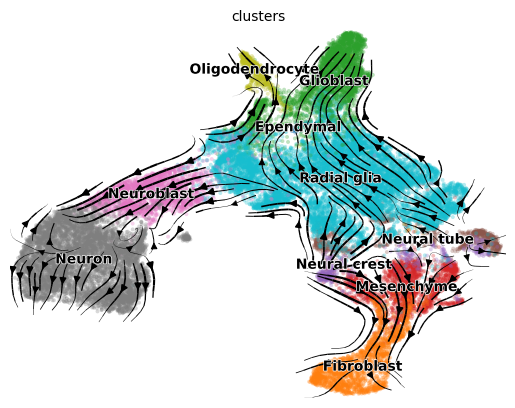

In [4]:
import scvelo as scv
vel_genes = np.load('/scratch/blaauw_root/blaauw1/gyichen/perf/Braindev_scv_vel_genes.npy')
scv.tl.velocity_graph(adata, vkey='velovae_velocity', gene_subset=adata.var_names[vel_genes])
scv.pl.velocity_embedding_stream(adata, vkey='velovae_velocity')

['Rsrc1']
---   Plotting  Results   ---


(None, None)

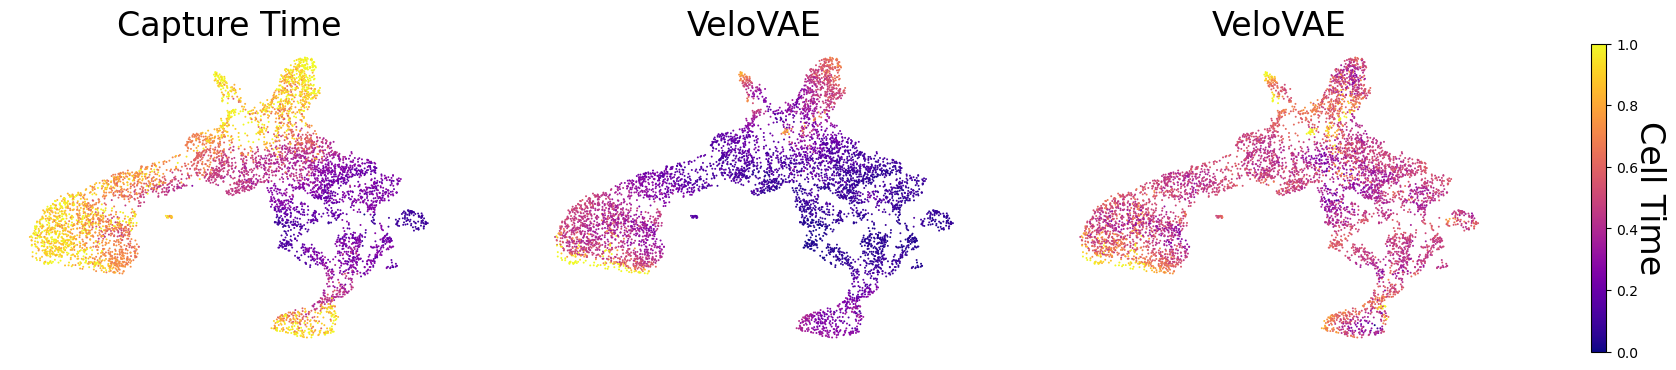

In [8]:
vv.post_analysis(adata,
                 'eval',
                 ['VeloVAE','FullVB'],
                 ['velovae','fullvb'],
                 compute_metrics=False,
                 plot_type=['time'],
                 figure_path=None)